In [1]:
cd ../..

/Users/fm/Desktop/Work/Patat


In [2]:
import importlib
import urllib
from collections import Counter
import pandas as pd

# Chargement et mise en forme corpus

In [13]:
# Parametres du notebook
#corpus_filename = 'data/corpus/220614-CorpusComplet.csv'
corpus_filename = 'data/corpus/220930-RecueilComplet.csv'
attr = 'site'
top_size = 300
threshold = 0.5

In [14]:
def load_corpus(corpus_filename):
    df_corpus = pd.read_csv(corpus_filename)
    # Suppression des articles qui n'ont pas été parsé de manière précise
    df_corpus = df_corpus[df_corpus['parse_method']=='parse']
    # Suppression articles vides éventuels
    df_corpus = df_corpus[df_corpus['article'].notna()]
    # Concaténation Titre et Article
    df_corpus.loc[:,'text'] = df_corpus['title']+'\n'+df_corpus['article']
    return df_corpus

In [15]:
df_corpus = load_corpus(corpus_filename)

In [16]:
df_corpus

url  \
2    https://www.breizh-info.com/2022/02/23/180457/...   
3    https://www.breizh-info.com/2022/02/20/180182/...   
4    https://www.breizh-info.com/2022/04/19/185260/...   
5    https://www.breizh-info.com/2022/04/15/184984/...   
6    https://www.breizh-info.com/2021/11/02/173738/...   
..                                                 ...   
463  https://www.wikistrike.com/2022/08/fresne-cett...   
464  https://www.wikistrike.com/2022/08/le-forum-ec...   
465  https://www.wikistrike.com/2022/08/le-masque-r...   
466  https://www.wikistrike.com/2022/08/l-un-des-pl...   
467  https://www.wikistrike.com/2022/09/les-command...   

                                                 title  \
2    Tests – vaccins – pass : fabrique de la paniqu...   
3    Covid-19. La pandémie et les vaccins, pour mie...   
4    Covid-19. Une épidémie quasiment terminée avan...   
5    Piscine, voile, ramadan : scènes de la vie ord...   
6    Faut-il vous métisser comme le suggère la pres...   
..                                                 ...   
463  Fresnes: cette prison où les condamnés finisse...   
464  Le Forum économique mondial estime qu’il exist...   
465     Le masque réduit les infections COVID de 0,06%   
466  L’un des plus grands complexes mégalithiques d...   
467  Les commandos ukrainiens qui ont attaqué la ce...   

                                               article parse_method  \
2    Cela fait 2 ans que la crise du coronavirus a ...        parse   
3    Ces dernières semaines, le monde entier a prêt...        parse   
4    Voici mon avant dernier bulletin de situation ...        parse   
5    On a beaucoup parlé du Grand remplacement dura...        parse   
6    Comme nous le verrons dans l’ensemble des étud...        parse   
..                                                 ...          ...   
463  Cette photo est une erreur \n\nEt nul n'est au...        parse   
464  Ne trahissant pas sa réputation de méchant d’u...        parse   
465  par Collectif Reinfocovid.\nCet article illust...        parse   
466  En Espagne, le site d’une future plantation d’...        parse   
467  (!) Source russe \n\n\nLes quelques unités de ...        parse   

                                                  date  \
2             Le \n\t\t\t\t\t\t\t\t\t\t23 février 2022   
3             Le \n\t\t\t\t\t\t\t\t\t\t20 février 2022   
4               Le \n\t\t\t\t\t\t\t\t\t\t19 avril 2022   
5               Le \n\t\t\t\t\t\t\t\t\t\t15 avril 2022   
6             Le \n\t\t\t\t\t\t\t\t\t\t2 novembre 2021   
..                                                 ...   
463  Publié par wikistrike.com\n                   ...   
464  Publié par wikistrike.com\n                   ...   
465  Publié par wikistrike.com\n                   ...   
466  Publié par wikistrike.com\n                   ...   
467  Publié par wikistrike.com\n                   ...   

                                                   tag abstract author  \
2    ['Santé', 'covid', 'crise', "décoder l'éco", '...      NaN    NaN   
3    ['A La Une', 'Santé', "coup d'etat mondial", '...      NaN    NaN   
4    ['A La Une', 'Santé', 'COVID-19', 'epidemie', ...      NaN    NaN   
5    ['Education', 'Société', 'burkini', 'hallal', ...      NaN    NaN   
6           ['Sciences', 'métis', 'metissage', 'race']      NaN    NaN   
..                                                 ...      ...    ...   
463                                                 []      NaN    NaN   
464                                                 []      NaN    NaN   
465                                                 []      NaN    NaN   
466                                                 []      NaN    NaN   
467                                                 []      NaN    NaN   

                date_iso  words  ...  des pages et des pages  \
2    2022-02-23T00:00:00    NaN  ...                     0.0   
3    2022-02-20T00:00:00    NaN  ...                     0.0   
4    2022-04-19T00:00:00  

# Compteurs de mots par valeur de l'attribut

In [17]:
import patat.ml.lex_analyser

In [18]:
importlib.reload(patat.ml.lex_analyser)
lex = patat.ml.lex_analyser.LexAnalyser()

In [19]:
def merge_texts(texts):
    result = ''
    for text in texts:
        result = result + text + '\n'
    return result

In [20]:
def count_words_col(df_corpus,attr):
    df_texts = pd.pivot_table(df_corpus, values='text', index=None, columns=attr, aggfunc=merge_texts)
    wc = {}
    word_analysis = {}
    for key in df_texts.keys():
        text = df_texts[key]['text']
        count_colname = str(key)
        wc[key] = lex.count_tokens(lex.get_words(text))
        for word in wc[key]:
            word_dic = word_analysis.get(word,{})
            word_dic[count_colname]=wc[key][word]
            word_analysis[word]=word_dic
    return word_analysis

In [21]:
def get_df_counters(df_corpus,attr):
    word_count = count_words_col(df_corpus,attr)
    df_counters = pd.DataFrame(word_count).transpose()
    df_counters=df_counters.fillna(0)
    return df_counters

In [22]:
df_counters = get_df_counters(df_corpus,'infox')

In [23]:
df_counters

0.0     1.0
rennes              24.0     6.0
reprise             10.0     8.0
des               3173.0  6186.0
vols                17.0    13.0
commerciaux         12.0     7.0
...                  ...     ...
rogov                0.0     1.0
dniepropietrovsk     0.0     1.0
energodar            0.0     1.0
barges               0.0     1.0
coulées              0.0     1.0

[34238 rows x 2 columns]

# Identification des mots communs

In [24]:
threshold = 1

In [25]:
def get_commonwords(df_counters,top_size,threshold):
    # Tableau de listes des <top_size> mots les plus courants par catégorie
    top_words = {}
    for key in df_counters.keys():
        top_words[key] = list(df_counters.nlargest(top_size,key).index)
    # Unification des listes, avec multiples occurences
    merged_list = []
    for key in top_words.keys():
        merged_list = merged_list + top_words[key]
    # Comptage occurences et suppression
    counter = Counter(merged_list)
    occ_threshold = int(len(df_counters.keys())*threshold)
    commonwords = []
    for word in counter:
        occ = counter[word]
        if occ >= occ_threshold:
            commonwords.append(word)
    return commonwords

In [26]:
commonwords = get_commonwords(df_counters,top_size,threshold)
print(len(commonwords))

224


In [27]:
threshold

1

In [28]:
commonwords

['de',
 'la',
 'le',
 'les',
 'et',
 'des',
 'en',
 'un',
 'du',
 'est',
 'une',
 'que',
 'pour',
 'dans',
 'qui',
 'il',
 'par',
 'sur',
 'au',
 'pas',
 'plus',
 'ce',
 'ne',
 'qu',
 'se',
 'ont',
 'avec',
 'sont',
 'ou',
 'son',
 'été',
 'nous',
 'aux',
 'mais',
 'comme',
 'cette',
 'on',
 'pays',
 'elle',
 'fait',
 'être',
 'tout',
 'ces',
 'même',
 'leur',
 'aussi',
 'sa',
 'si',
 'monde',
 'ses',
 'contre',
 'sans',
 'bien',
 'vous',
 'ils',
 'politique',
 'faire',
 'depuis',
 'france',
 'je',
 'russie',
 'deux',
 'entre',
 'après',
 'avait',
 'guerre',
 'non',
 'ukraine',
 'autres',
 'peut',
 'covid',
 'était',
 'selon',
 'président',
 'avoir',
 'ainsi',
 'ans',
 'tous',
 'cela',
 'où',
 'alors',
 'leurs',
 'encore',
 'sous',
 'otan',
 'très',
 'temps',
 'donc',
 'moins',
 'dont',
 'états',
 'autre',
 'également',
 'état',
 'vers',
 'cas',
 'déjà',
 'russe',
 'déclaré',
 'soit',
 'europe',
 'lui',
 'gouvernement',
 'avant',
 'fin',
 'notre',
 'prix',
 'unis',
 'personnes',
 'va',

In [29]:
pd.DataFrame(commonwords).to_csv('cw.csv')

In [30]:
df_counters

0.0     1.0
rennes              24.0     6.0
reprise             10.0     8.0
des               3173.0  6186.0
vols                17.0    13.0
commerciaux         12.0     7.0
...                  ...     ...
rogov                0.0     1.0
dniepropietrovsk     0.0     1.0
energodar            0.0     1.0
barges               0.0     1.0
coulées              0.0     1.0

[34238 rows x 2 columns]

# Wordclouds

In [31]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

In [32]:
df_texts = pd.pivot_table(df_corpus, values='text', index=None, columns=[attr], aggfunc=merge_texts)

In [33]:
df_texts

site                                  fr.novopress.info  \
text  Immigration clandestine : répartir ou renvoyer...   

site                                        fr.sott.net  \
text  Le Pentagone organise la victoire de l'Ukraine...   

site                                      infodujour.fr  \
text  Covid-19 : les vaccins ne sont pas sans risque...   

site                               lalettrepatriote.com  \
text  Tous les vitraux de nos églises et cathédrales...   

site                                    lemediaen442.fr  \
text  L’influenceur aux millions de vues, Nicolas Sc...   

site                              lesakerfrancophone.fr  \
text  Ukraine : un cataclysme au regard de l’Histoir...   

site                                    lesdeqodeurs.fr  \
text  Ces personnes méritent le blâme pour la mort d...   

site                             lesmoutonsrebelles.com  \
text  Qu’est-ce que le « Grand Reset » et que veulen...   

site                                 lesobservateurs.ch  \
text  Lavrov : Si l’Occident ne s’accommode pas d’un...   

site                          lezarceleurs.blogspot.com  ...  \
text  Les vaccins Covid de Pfizer détruisent  tous l...  ...   

site                                  www.francesoir.fr  \
text  L’avortement sans condition jusqu’à neuf mois ...   

site                             www.lelibrepenseur.org  \
text  Sanna Marin, la Première ministre finlandaise,...   

site                                  www.les-crises.fr  \
text  LES LOBBYS CONTRE LA SANTÉ : LA FOLLE HISTOIRE...   

site                                www.lesalonbeige.fr  \
text  Que vont devenir les armes livrées à l’Ukraine...   

site                              www.mondialisation.ca  \
text  >Mondialisation.ca\nCELINE DION\nVu le nombre ...   

site                          www.nouvelordremondial.cc  \
text  Les États-Unis financent un logiciel permettan...   

site                                    www.polemia.com  \
text  La droite face à l’impératif culturel\nPar Thi...   

site                        www.profession-gendarme.com  \
text  BlackRock Gate : comment Larry Fink s’est payé...   

site                                www.voltairenet.org  \
text  L’Ukraine bientôt dépecée par les Alliés\nWash...   

site                                 www.wikistrike.com  
text  Un groupe secret financé par Soros travaille e...  

[1 rows x 24 columns]

In [34]:
def display_wc(text,commonwords):
    wordcloud = WordCloud(background_color = 'white', stopwords = commonwords, max_words = 50, regexp=r"\w\w+").generate(text)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show();

Attribut : site
fr.novopress.info


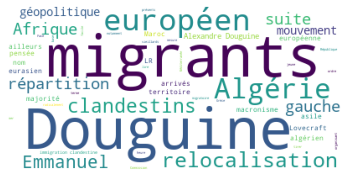

fr.sott.net


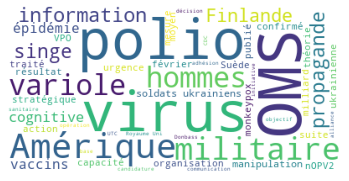

infodujour.fr


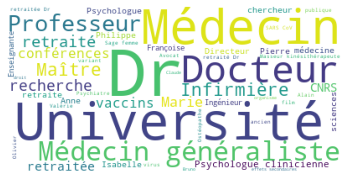

lalettrepatriote.com


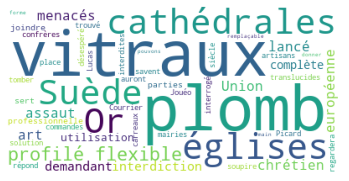

lemediaen442.fr


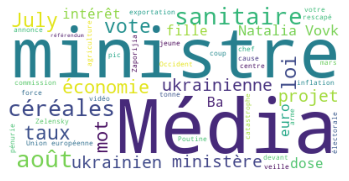

lesakerfrancophone.fr


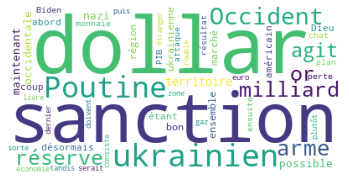

lesdeqodeurs.fr


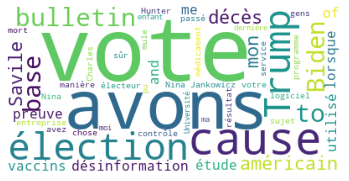

lesmoutonsrebelles.com


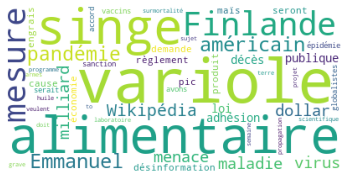

lesobservateurs.ch


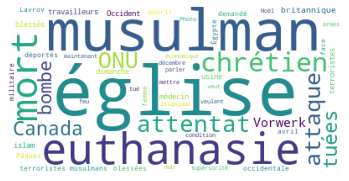

lezarceleurs.blogspot.com


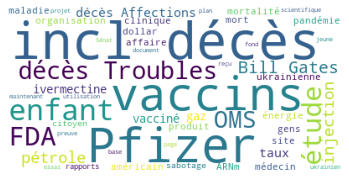

reseauinternational.net


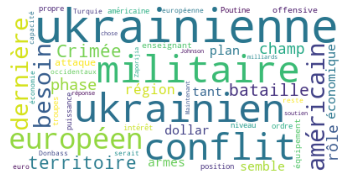

www.breizh-info.com


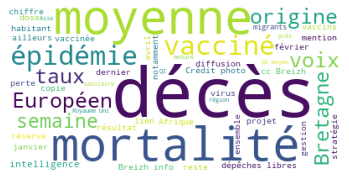

www.cnews.fr


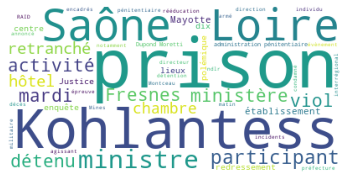

www.dreuz.info


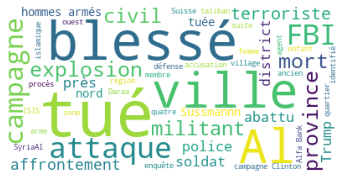

www.francesoir.fr


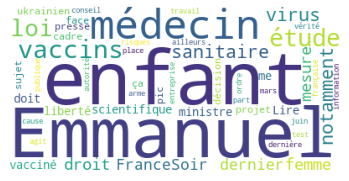

www.lelibrepenseur.org


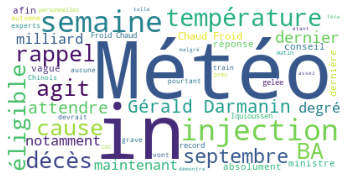

www.les-crises.fr


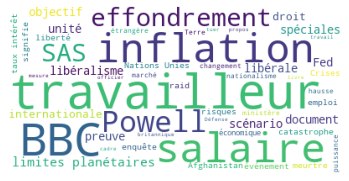

www.lesalonbeige.fr


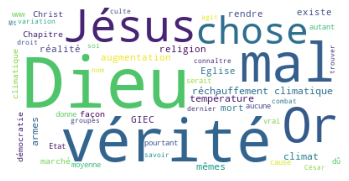

www.mondialisation.ca


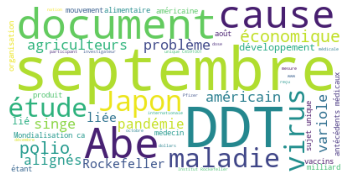

www.nouvelordremondial.cc


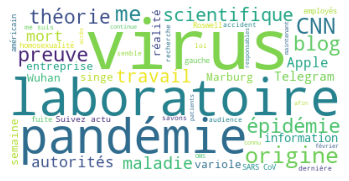

www.polemia.com


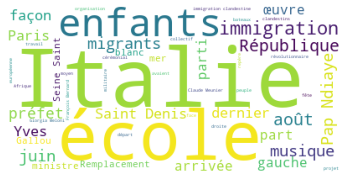

www.profession-gendarme.com


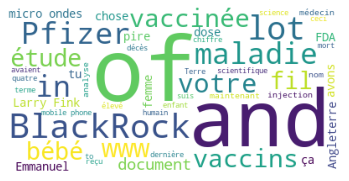

www.voltairenet.org


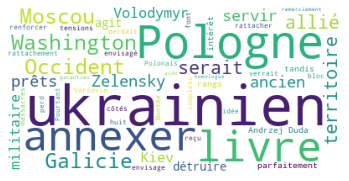

www.wikistrike.com


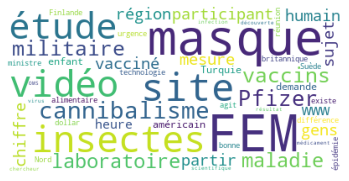

In [35]:
print(f'Attribut : {attr}')
for value in df_texts.keys():
    print(value)
    display_wc(df_texts[value][0],commonwords)

# Traitement d'une liste d'attributs

## Labels Booleens

In [36]:
attrs = ['infox', 'signé',
    'lieux, dates et personnes ', 'lieux, dates et personnes cohérentes',
    'points de vue différents présentés', 'écriture de qualité',
    'faits', 'opinions', 'fausse nouvelle', 'insinuations',
    'exagération', 'scientifique sulfureux', 'des pages et des pages',
    'des chiffres et des tableaux', 'sophisme', 'inversion de la preuve',
    'invérifiable', 'propos rapporté', 'sources citées', 'titre décalé',]
top_size = 300
threshold = 1

----------------------------------------------------
Label : infox
Common words : ['de', 'la', 'le', 'les', 'et', 'des', 'en', 'un', 'du', 'est', 'une', 'que', 'pour', 'dans', 'qui', 'il', 'par', 'sur', 'au', 'pas', 'plus', 'ce', 'ne', 'qu', 'se', 'ont', 'avec', 'sont', 'ou', 'son', 'été', 'nous', 'aux', 'mais', 'comme', 'cette', 'on', 'pays', 'elle', 'fait', 'être', 'tout', 'ces', 'même', 'leur', 'aussi', 'sa', 'si', 'monde', 'ses', 'contre', 'sans', 'bien', 'vous', 'ils', 'politique', 'faire', 'depuis', 'france', 'je', 'russie', 'deux', 'entre', 'après', 'avait', 'guerre', 'non', 'ukraine', 'autres', 'peut', 'covid', 'était', 'selon', 'président', 'avoir', 'ainsi', 'ans', 'tous', 'cela', 'où', 'alors', 'leurs', 'encore', 'sous', 'otan', 'très', 'temps', 'donc', 'moins', 'dont', 'états', 'autre', 'également', 'état', 'vers', 'cas', 'déjà', 'russe', 'déclaré', 'soit', 'europe', 'lui', 'gouvernement', 'avant', 'fin', 'notre', 'prix', 'unis', 'personnes', 'va', 'français', 'macron', 'cri

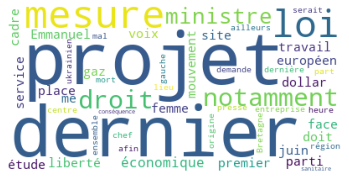

infox = 1.0


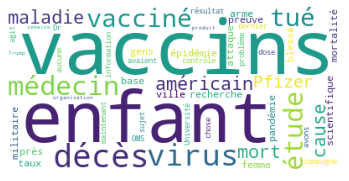

----------------------------------------------------
Label : signé
Common words : ['de', 'la', 'le', 'les', 'et', 'des', 'en', 'un', 'une', 'que', 'du', 'est', 'dans', 'pour', 'qui', 'il', 'par', 'sur', 'pas', 'au', 'plus', 'ce', 'ont', 'qu', 'ne', 'été', 'sont', 'avec', 'se', 'ou', 'nous', 'aux', 'son', 'comme', 'ils', 'mais', 'on', 'être', 'cette', 'elle', 'fait', 'covid', 'ces', 'vous', 'tout', 'même', 'ses', 'si', 'pays', 'deux', 'je', 'leur', 'personnes', 'était', 'sa', 'bien', 'contre', 'non', 'aussi', 'selon', 'ans', 'décès', 'après', 'depuis', 'entre', 'autres', 'cela', 'faire', 'avait', 'sans', 'avoir', 'france', 'monde', 'très', 'peut', 'déclaré', 'russie', 'tous', 'également', 'où', 'vaccin', 'dont', 'leurs', 'alors', 'cas', 'ainsi', 'sous', 'moins', 'ukraine', 'état', 'guerre', 'encore', 'vaccins', 'lors', 'vaccination', 'états', 'autre', 'the', 'com', 'donc', 'soit', 'données', 'santé', 'lui', 'président', 'unis', 'fois', 'avant', 'trois', 'gouvernement', 'millions', 'fran

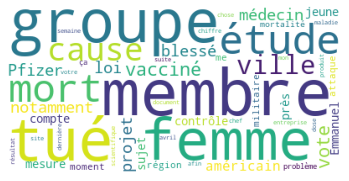

signé = 1.0


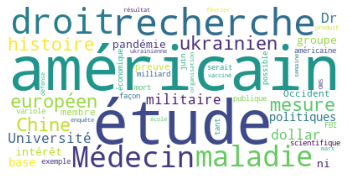

----------------------------------------------------
Label : lieux, dates et personnes 
Common words : ['de', 'la', 'les', 'le', 'et', 'des', 'en', 'un', 'est', 'que', 'une', 'dans', 'du', 'qui', 'pour', 'il', 'par', 'pas', 'sur', 'plus', 'ce', 'au', 'qu', 'ont', 'ne', 'sont', 'été', 'avec', 'se', 'ou', 'ils', 'nous', 'mais', 'être', 'comme', 'cette', 'on', 'aux', 'son', 'elle', 'fait', 'ces', 'tout', 'même', 'vous', 'leur', 'si', 'bien', 'covid', 'je', 'était', 'pays', 'deux', 'entre', 'ses', 'sa', 'cela', 'contre', 'non', 'autres', 'monde', 'russie', 'sans', 'faire', 'personnes', 'depuis', 'aussi', 'après', 'très', 'peut', 'décès', 'où', 'leurs', 'tous', 'ans', 'avoir', 'moins', 'alors', 'selon', 'avait', 'dont', 'france', 'encore', 'ukraine', 'état', 'déclaré', 'lui', 'vaccins', 'états', 'sous', 'guerre', 'donc', 'également', 'ainsi', 'cas', 'autre', 'vaccin', 'soit', 'temps', 'avant', 'lors', 'politique', 'vaccination', 'unis', 'the', 'système', 'fois', 'données', 'otan', 'vers', '

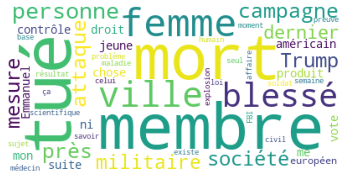

lieux, dates et personnes  = 1.0


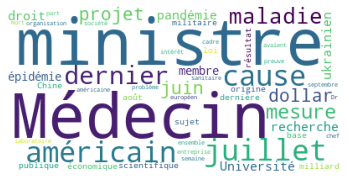

----------------------------------------------------
Label : lieux, dates et personnes cohérentes
Common words : ['de', 'la', 'les', 'le', 'et', 'des', 'en', 'un', 'est', 'que', 'une', 'dans', 'du', 'pour', 'qui', 'il', 'par', 'pas', 'sur', 'plus', 'ce', 'au', 'qu', 'ont', 'ne', 'sont', 'été', 'se', 'avec', 'ou', 'ils', 'nous', 'mais', 'être', 'comme', 'on', 'cette', 'son', 'aux', 'elle', 'fait', 'ces', 'tout', 'vous', 'même', 'leur', 'si', 'je', 'était', 'covid', 'bien', 'pays', 'deux', 'ses', 'entre', 'sa', 'cela', 'contre', 'russie', 'non', 'autres', 'sans', 'personnes', 'faire', 'monde', 'après', 'depuis', 'aussi', 'peut', 'très', 'décès', 'tous', 'où', 'ans', 'leurs', 'avoir', 'moins', 'avait', 'alors', 'selon', 'dont', 'france', 'ukraine', 'encore', 'déclaré', 'lui', 'état', 'vaccins', 'sous', 'donc', 'ainsi', 'guerre', 'vaccin', 'également', 'cas', 'états', 'soit', 'temps', 'autre', 'avant', 'lors', 'vaccination', 'otan', 'données', 'fois', 'the', 'unis', 'système', 'russe', 've

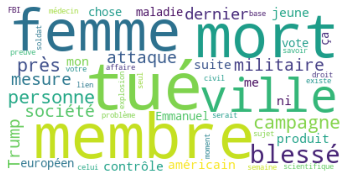

lieux, dates et personnes cohérentes = 1.0


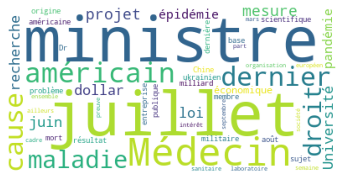

----------------------------------------------------
Label : points de vue différents présentés
Common words : ['de', 'la', 'les', 'le', 'et', 'des', 'en', 'un', 'que', 'est', 'une', 'du', 'dans', 'pour', 'qui', 'il', 'par', 'sur', 'pas', 'au', 'plus', 'ce', 'ont', 'qu', 'ne', 'sont', 'été', 'avec', 'se', 'ou', 'nous', 'comme', 'mais', 'aux', 'ils', 'cette', 'être', 'son', 'on', 'fait', 'elle', 'ces', 'tout', 'pays', 'même', 'covid', 'vous', 'si', 'leur', 'était', 'contre', 'bien', 'ses', 'non', 'sa', 'deux', 'monde', 'russie', 'depuis', 'je', 'sans', 'autres', 'aussi', 'entre', 'faire', 'personnes', 'cela', 'après', 'peut', 'très', 'décès', 'selon', 'ukraine', 'ans', 'avait', 'tous', 'où', 'guerre', 'avoir', 'leurs', 'france', 'déclaré', 'moins', 'encore', 'dont', 'états', 'cas', 'alors', 'ainsi', 'vaccin', 'vaccins', 'sous', 'également', 'donc', 'unis', 'autre', 'soit', 'politique', 'état', 'lui', 'santé', 'avant', 'fois', 'temps', 'président', 'lors', 'vaccination', 'russe', 'virus'

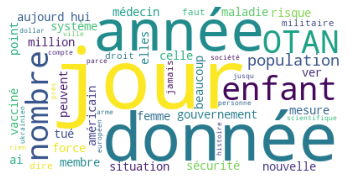

points de vue différents présentés = 1.0


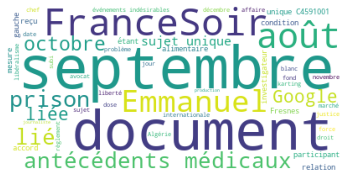

----------------------------------------------------
Label : écriture de qualité
Common words : ['de', 'la', 'le', 'et', 'les', 'est', 'un', 'que', 'des', 'il', 'en', 'une', 'du', 'qui', 'pour', 'par', 'sur', 'qu', 'pas', 'plus', 'dans', 'ne', 'ce', 'tout', 'au', 'sont', 'nous', 'son', 'elle', 'on', 'avec', 'comme', 'se', 'vous', 'été', 'ils', 'ses', 'peut', 'autres', 'ou', 'monde', 'être', 'données', 'ont', 'même', 'cela', 'fait', 'mais', 'cette', 'système', 'non', 'dit', 'https', 'vaccins', 'pfizer', 'ainsi', 'autre', 'ces', 'aux', 'com', 'leur', 'certains', 'je', 'où', 'sans', 'eu', 'juillet', 'sera', 'temps', 'bien', 'faire', 'mort', 'source', 'personnes', 'tous', 'cas', 'quand', 'leurs', 'si', 'parce', 'voir', 'enfants', 'fois', 'ai', 'avait', 'aussi', 'moins', 'quelques', 'ici', 'nos', 'rien', 'après', 'sa', 'ceux', 'alors', 'projet', 'the', 'faut', 'exemple', 'était', 'gens', 'santé', 'personne', 'très', 'fin', 'car', 'contre', 'avons', 'depuis', 'grand', 'déjà', 'base', 'mon', 

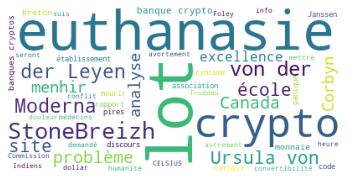

écriture de qualité = 1.0


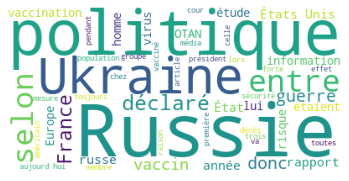

----------------------------------------------------
Label : faits
Common words : ['de', 'la', 'le', 'et', 'les', 'des', 'en', 'un', 'que', 'est', 'une', 'du', 'dans', 'pour', 'qui', 'il', 'par', 'pas', 'sur', 'au', 'plus', 'ce', 'qu', 'ont', 'ne', 'été', 'sont', 'avec', 'se', 'ou', 'nous', 'ils', 'mais', 'son', 'on', 'être', 'comme', 'cette', 'aux', 'elle', 'fait', 'tout', 'ces', 'pays', 'même', 'vous', 'russie', 'si', 'deux', 'leur', 'décès', 'covid', 'bien', 'était', 'je', 'entre', 'ses', 'sa', 'cela', 'monde', 'très', 'depuis', 'contre', 'non', 'autres', 'aussi', 'faire', 'personnes', 'ukraine', 'après', 'sans', 'peut', 'moins', 'déclaré', 'ans', 'selon', 'avoir', 'avait', 'où', 'alors', 'tous', 'france', 'états', 'leurs', 'état', 'encore', 'dont', 'lui', 'otan', 'donc', 'guerre', 'sous', 'politique', 'cas', 'également', 'unis', 'vaccins', 'vaccin', 'avant', 'lors', 'soit', 'autre', 'vaccination', 'ainsi', 'the', 'temps', 'russe', 'nombre', 'fois', 'président', 'peu', 'vers', 'mill

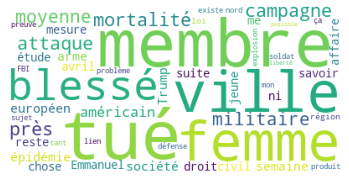

faits = 1.0


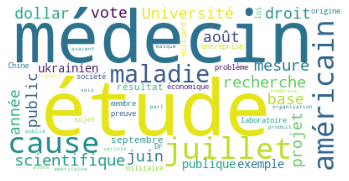

----------------------------------------------------
Label : opinions
Common words : ['de', 'la', 'le', 'les', 'et', 'des', 'en', 'un', 'une', 'du', 'que', 'est', 'dans', 'pour', 'qui', 'il', 'par', 'sur', 'au', 'plus', 'pas', 'ont', 'ce', 'qu', 'été', 'ne', 'avec', 'sont', 'se', 'ou', 'son', 'aux', 'nous', 'cette', 'ils', 'être', 'mais', 'on', 'elle', 'comme', 'fait', 'ces', 'pays', 'covid', 'deux', 'décès', 'tout', 'vous', 'même', 'était', 'entre', 'leur', 'si', 'contre', 'sa', 'ses', 'après', 'depuis', 'russie', 'aussi', 'autres', 'je', 'bien', 'personnes', 'non', 'selon', 'très', 'déclaré', 'avait', 'ans', 'faire', 'cela', 'moins', 'ukraine', 'france', 'sans', 'vaccin', 'avoir', 'monde', 'encore', 'dr', 'dont', 'également', 'leurs', 'où', 'cas', 'alors', 'peut', 'état', 'sous', 'tous', 'otan', 'lors', 'guerre', 'the', 'donc', 'ainsi', 'président', 'vaccination', 'vaccins', 'états', 'nombre', 'soit', 'avant', 'lui', 'santé', 'fois', 'vers', 'com', 'trois', 'autre', 'données', 'milli

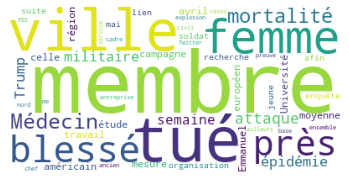

opinions = 1.0


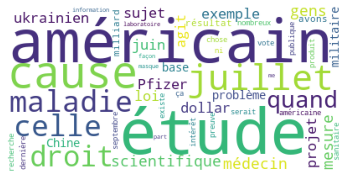

----------------------------------------------------
Label : fausse nouvelle
Common words : ['de', 'la', 'le', 'les', 'et', 'des', 'en', 'un', 'une', 'du', 'est', 'que', 'dans', 'pour', 'qui', 'il', 'par', 'sur', 'pas', 'au', 'plus', 'ce', 'qu', 'ont', 'ne', 'été', 'sont', 'avec', 'se', 'ou', 'nous', 'aux', 'son', 'comme', 'mais', 'cette', 'on', 'être', 'elle', 'fait', 'ils', 'ces', 'pays', 'tout', 'même', 'leur', 'si', 'ses', 'était', 'contre', 'sa', 'vous', 'deux', 'bien', 'covid', 'aussi', 'entre', 'monde', 'depuis', 'russie', 'sans', 'non', 'autres', 'faire', 'je', 'après', 'cela', 'avait', 'selon', 'ans', 'personnes', 'peut', 'très', 'ukraine', 'france', 'guerre', 'avoir', 'tous', 'où', 'leurs', 'dont', 'états', 'moins', 'alors', 'politique', 'déclaré', 'décès', 'encore', 'ainsi', 'vaccin', 'sous', 'également', 'cas', 'état', 'unis', 'lui', 'autre', 'soit', 'donc', 'président', 'the', 'lors', 'santé', 'avant', 'temps', 'vaccination', 'otan', 'russe', 'gouvernement', 'déjà', 'fois'

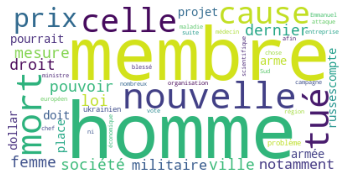

fausse nouvelle = 1.0


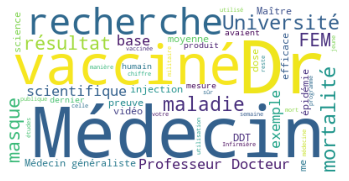

----------------------------------------------------
Label : insinuations
Common words : ['de', 'la', 'le', 'les', 'et', 'des', 'en', 'un', 'du', 'une', 'est', 'dans', 'que', 'pour', 'qui', 'par', 'il', 'sur', 'au', 'plus', 'pas', 'ce', 'ont', 'qu', 'ne', 'été', 'sont', 'avec', 'se', 'ou', 'aux', 'on', 'nous', 'mais', 'pays', 'son', 'cette', 'elle', 'comme', 'être', 'fait', 'ces', 'tout', 'même', 'deux', 'ils', 'covid', 'décès', 'leur', 'sa', 'si', 'depuis', 'monde', 'aussi', 'contre', 'entre', 'ses', 'vous', 'bien', 'très', 'sans', 'non', 'je', 'autres', 'après', 'russie', 'faire', 'france', 'ans', 'était', 'moins', 'peut', 'personnes', 'avait', 'cela', 'politique', 'guerre', 'avoir', 'où', 'ukraine', 'selon', 'tous', 'alors', 'encore', 'leurs', 'état', 'sous', 'cas', 'dont', 'déclaré', 'ainsi', 'donc', 'autre', 'otan', 'nombre', 'vaccin', 'lors', 'président', 'temps', 'également', 'vaccination', 'soit', 'avant', 'déjà', 'vers', 'vaccins', 'europe', 'millions', 'états', 'fois', 'lui',

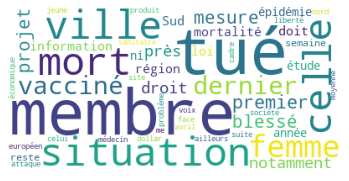

insinuations = 1.0


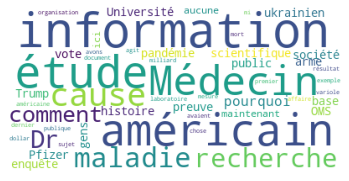

----------------------------------------------------
Label : exagération


KeyError: 'exagération'

In [37]:
for attr in attrs:
    print('----------------------------------------------------')
    print(f'Label : {attr}')
    df_counters = get_df_counters(df_corpus,attr)
    commonwords = get_commonwords(df_counters,top_size,threshold)
    print(f'Common words : {commonwords}')
    print()
#    for value in df_counters.keys():
#        print(value)
#        print(df_counters.drop(index = stopwords).nlargest(30,value))

    df_texts = pd.pivot_table(df_corpus, values='text', index=None, columns=[attr], aggfunc=merge_texts)
    for value in df_texts.keys():
        print(f'{attr} = {value}')
        display_wc(df_texts[value][0],commonwords)

## Labels multivalués

In [30]:
attrs = ['site']
top_size = 300
threshold = 0.5

----------------------------------------------------
Label : site
Common words : ['la', 'et', 'de', 'le', 'nous', 'les', 'pour', 'qui', 'une', 'ont', 'été', 'du', 'en', 'dans', 'des', 'est', 'russe', 'contre', 'que', 'cette', 'sont', 'un', 'état', 'pas', 'russie', 'pays', 'nouvelle', 'son', 'ses', 'europe', 'ces', 'nos', 'pouvoir', 'politique', 'leurs', 'ce', 'tout', 'ukraine', 'autre', 'avec', 'comme', 'pendant', 'guerre', 'mondiale', 'au', 'prix', 'millions', 'avoir', 'sécurité', 'qu', 'il', 'grande', 'par', 'vers', 'bien', 'ne', 'histoire', 'toute', 'sur', 'mais', 'mai', 'européenne', 'public', 'deux', 'sa', 'aussi', 'france', 'partie', 'avait', 'autres', 'avant', 'otan', 'voir', 'ci', 'toujours', 'états', 'unis', 'après', 'faire', 'plus', 'ou', 'être', 'se', 'covid', 'aux', 'leur', 'même', 'fait', 'elle', 'depuis', 'ils', 'personnes', 'monde', 'cela', 'on', 'si', 'sans', 'selon', 'vous', 'entre', 'était', 'non', 'peut', 'je', 'président', 'santé', 'ans', 'cas', 'où', 'alors', 'très

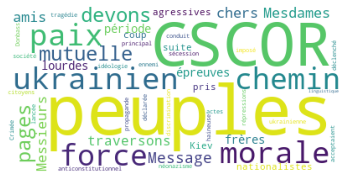

fr.sott.net


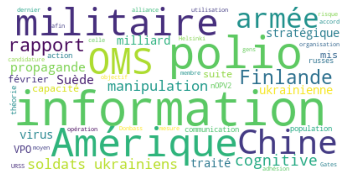

infodujour.fr


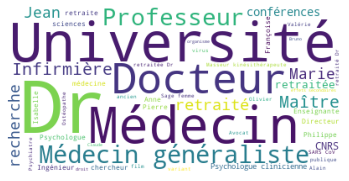

lemediaen442.fr


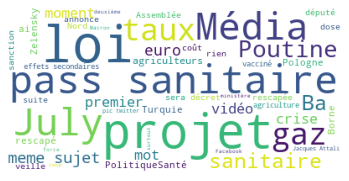

lesdeqodeurs.fr


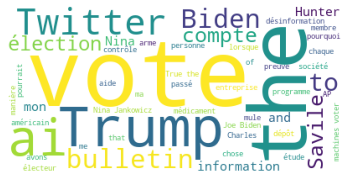

lesmoutonsrebelles.com


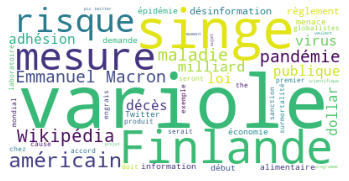

lezarceleurs.blogspot.com


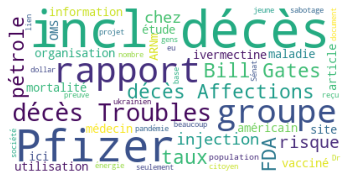

www.breizh-info.com


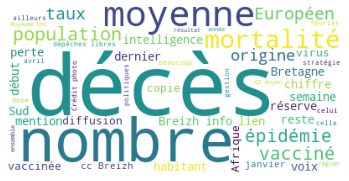

www.dreuz.info


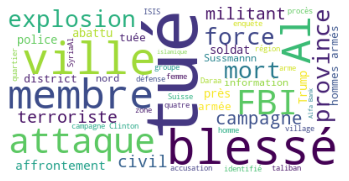

www.francesoir.fr


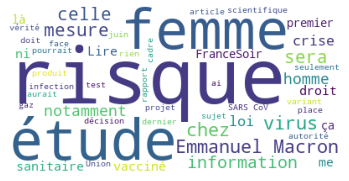

www.lelibrepenseur.org


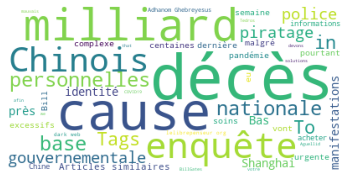

www.mondialisation.ca


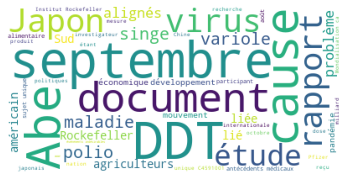

www.polemia.com


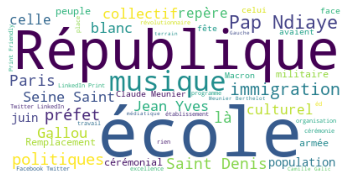

www.profession-gendarme.com


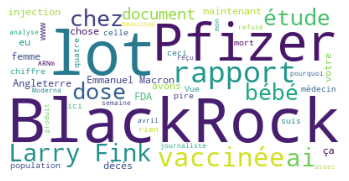

www.voltairenet.org


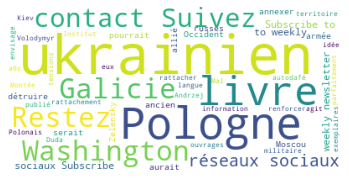

www.wikistrike.com


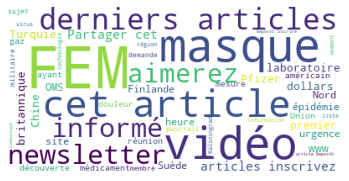

In [31]:
for attr in attrs:
    print('----------------------------------------------------')
    print(f'Label : {attr}')
    df_counters = get_df_counters(df_corpus,attr)
    commonwords = get_commonwords(df_counters,top_size,threshold)
    print(f'Common words : {commonwords}')
    print()
#    for value in df_counters.keys():
#        print(value)
#        print(df_counters.drop(index = stopwords).nlargest(30,value))

    df_texts = pd.pivot_table(df_corpus, values='text', index=None, columns=[attr], aggfunc=merge_texts)
    for value in df_texts.keys():
        print(value)
        display_wc(df_texts[value][0],commonwords)

# Bricolages

In [59]:
keep_words = ['covid',
    'france',
    'politique',
    'guerre',
    'otan',
    'russie',
    'ukraine',
    'président',
    'gouvernement',
    'santé',
    'sanitaire',
    'macron',
    'europe',
    'vaccin',
    'russe',
    'sécurité',
    'vaccination',
    'twitter',
    'mondiale',
    'emmanuel',
    'chine',
    'politiques',
    'public',
    'femmes',
    'vaccins',
    'système',
    'population',
    'médias']
keep_words

['covid',
 'france',
 'politique',
 'guerre',
 'otan',
 'russie',
 'ukraine',
 'président',
 'gouvernement',
 'santé',
 'sanitaire',
 'macron',
 'europe',
 'vaccin',
 'russe',
 'sécurité',
 'vaccination',
 'twitter',
 'mondiale',
 'emmanuel',
 'chine',
 'politiques',
 'public',
 'femmes',
 'vaccins',
 'système',
 'population',
 'médias']

In [62]:
stop_words = []
for word in commonwords:
    if word not in keep_words:
        stop_words.append(word)

In [63]:
stop_words

['de',
 'la',
 'le',
 'les',
 'et',
 'des',
 'en',
 'un',
 'du',
 'une',
 'est',
 'pour',
 'que',
 'dans',
 'qui',
 'il',
 'sur',
 'par',
 'au',
 'pas',
 'plus',
 'ce',
 'ne',
 'qu',
 'se',
 'avec',
 'ou',
 'sont',
 'ont',
 'son',
 'aux',
 'été',
 'cette',
 'nous',
 'mais',
 'on',
 'comme',
 'être',
 'pays',
 'aussi',
 'elle',
 'fait',
 'vous',
 'tout',
 'ces',
 'même',
 'monde',
 'si',
 'sa',
 'leur',
 'ses',
 'bien',
 'contre',
 'faire',
 'sans',
 'non',
 'ils',
 'deux',
 'depuis',
 'entre',
 'avait',
 'je',
 'après',
 'autres',
 'ans',
 'ainsi',
 'tous',
 'avoir',
 'selon',
 'peut',
 'était',
 'encore',
 'où',
 'sous',
 'cela',
 'donc',
 'déclaré',
 'vers',
 'cas',
 'très',
 'leurs',
 'moins',
 'déjà',
 'com',
 'mai',
 'dont',
 'alors',
 'temps',
 'notre',
 'avant',
 'crise',
 'également',
 'personnes',
 'autre',
 'va',
 'juillet',
 'lors',
 'lui',
 'faut',
 'soit',
 'français',
 'voir',
 'état',
 'fin',
 'cet',
 'mois',
 'première',
 'source',
 'car',
 'années',
 'pourrait',
 'plus

In [65]:
df_texts = pd.pivot_table(df_corpus, values='text', index=None, columns=['infox'], aggfunc=merge_texts)

In [66]:
df_texts

infox                                                0.0  \
text   Rennes. Reprise des vols commerciaux le 15 jui...   

infox                                                1.0  
text   Tests – vaccins – pass : fabrique de la paniqu...

## Infox = 0

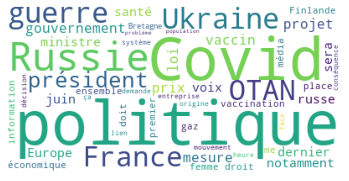

In [71]:
text = df_texts[0]['text']
display_wc(text,stop_words)

## Infox = 1

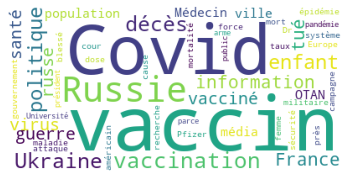

In [72]:
text = df_texts[1]['text']
display_wc(text,stop_words)

In [76]:
df_counters = pd.DataFrame(count_words_col(df_corpus,'infox')).transpose()

In [89]:
df_counters = df_counters.fillna(0)

In [98]:
df_counters = df_counters.drop(axis = 0, index = stop_words)

In [108]:
df_counters['freq_0'] = df_counters['0.0']/len(df_texts[0]['text'])*1000

In [109]:
df_counters['freq_1'] = df_counters['1.0']/len(df_texts[1]['text'])*1000

In [110]:
df_counters['freq_corpus'] = (df_counters['1.0']+df_counters['0.0'])/(len(df_texts[0]['text'])+len(df_texts[1]['text']))*1000

In [111]:
df_counters.nlargest(50,'freq_corpus')

0.0    1.0    freq_0    freq_1  freq_corpus     diff_freq
covid         189.0  533.0  0.258494  0.337515     0.312507  6.244334e-09
décès          14.0  500.0  0.019148  0.316618     0.222477  8.848860e-08
russie        130.0  308.0  0.177800  0.195037     0.189582  2.971070e-10
vaccin         73.0  352.0  0.099841  0.222899     0.183955  1.514317e-08
ukraine       124.0  245.0  0.169594  0.155143     0.159716  2.088293e-10
guerre        143.0  223.0  0.195580  0.141212     0.158418  2.955908e-09
france        162.0  200.0  0.221566  0.126647     0.156686  9.009584e-09
vaccins        46.0  280.0  0.062914  0.177306     0.141104  1.308559e-08
vaccination    65.0  258.0  0.088900  0.163375     0.139806  5.546517e-09
santé          82.0  224.0  0.112151  0.141845     0.132448  8.817432e-10
politique     147.0  145.0  0.201051  0.091819     0.126388  1.193151e-08
otan          134.0  157.0  0.183271  0.099418     0.125955  7.031261e-09
dr             19.0  261.0  0.025986  0.165275     0.121194  1.940128e-08
président     119.0  142.0  0.162755  0.089920     0.112970  5.305051e-09
gouvernement   98.0  151.0  0.134034  0.095619     0.107776  1.475723e-09
virus          30.0  212.0  0.041031  0.134246     0.104746  8.689090e-09
sécurité       67.0  172.0  0.091635  0.108917     0.103448  2.986420e-10
mondiale       57.0  179.0  0.077958  0.113349     0.102149  1.252511e-09
enfants        31.0  199.0  0.042398  0.126014     0.099552  6.991557e-09
macron         77.0  139.0  0.105312  0.088020     0.093492  2.990286e-10
russe          72.0  144.0  0.098474  0.091186     0.093492  5.311210e-11
europe         76.0  136.0  0.103945  0.086120     0.091761  3.177114e-10
médias         43.0  168.0  0.058811  0.106384     0.091328  2.263182e-09
effets         34.0  169.0  0.046502  0.107017     0.087866  3.662111e-09
système        45.0  156.0  0.061546  0.098785     0.087000  1.386721e-09
campagne       23.0  176.0  0.031457  0.111450     0.086134  6.398822e-09
al              1.0  193.0  0.001368  0.122215     0.083970  1.460396e-08
ville          26.0  160.0  0.035560  0.101318     0.080507  4.324086e-09
pfizer         20.0  166.0  0.027354  0.105117     0.080507  6.047138e-09
population     44.0  141.0  0.060178  0.089286     0.080074  8.472670e-10
médecin         6.0  175.0  0.008206  0.110816     0.078343  1.052884e-08
twitter        64.0  115.0  0.087532  0.072822     0.077477  2.163876e-10
ministre      110.0   66.0  0.150446  0.041794     0.076179  1.180536e-08
prix           95.0   81.0  0.129931  0.051292     0.076179  6.184026e-09
premier        93.0   76.0  0.127195  0.048126     0.073149  6.251967e-09
mortalité      10.0  157.0  0.013677  0.099418     0.072283  7.351543e-09
vaccinés       29.0  138.0  0.039663  0.087387     0.072283  2.277534e-09
sanitaire      81.0   84.0  0.110783  0.053192     0.071418  3.316745e-09
armée          11.0  153.0  0.015045  0.096885     0.070985  6.697868e-09
trump          14.0  148.0  0.019148  0.093719     0.070119  5.560871e-09
taux           19.0  141.0  0.025986  0.089286     0.069254  4.006908e-09
cours          36.0  123.0  0.049237  0.077888     0.068821  8.208875e-10
près           29.0  129.0  0.039663  0.081687     0.068388  1.766050e-09
forces         16.0  141.0  0.021883  0.089286     0.067955  4.543193e-09
avril          29.0  125.0  0.039663  0.079155     0.066657  1.559574e-09
sera           72.0   78.0  0.098474  0.049392     0.064925  2.408982e-09
nord           33.0  117.0  0.045134  0.074089     0.064925  8.383801e-10
aucun          37.0  113.0  0.050605  0.071556     0.064925  4.389479e-10
aurait         28.0  120.0  0.038295  0.075988     0.064060  1.420759e-09
notamment      70.0   75.0  0.095738  0.047493     0.062761  2.327648e-09

In [112]:
df_counters['diff_freq']=(df_counters['freq_0']-df_counters['freq_1'])**2

In [113]:
df_counters.nlargest(50,'diff_freq')

0.0    1.0    freq_0    freq_1  freq_corpus  diff_freq
décès             14.0  500.0  0.019148  0.316618     0.222477   0.088489
dr                19.0  261.0  0.025986  0.165275     0.121194   0.019401
vaccin            73.0  352.0  0.099841  0.222899     0.183955   0.015143
al                 1.0  193.0  0.001368  0.122215     0.083970   0.014604
vaccins           46.0  280.0  0.062914  0.177306     0.141104   0.013086
politique        147.0  145.0  0.201051  0.091819     0.126388   0.011932
ministre         110.0   66.0  0.150446  0.041794     0.076179   0.011805
loi               93.0   33.0  0.127195  0.020897     0.054537   0.011299
médecin            6.0  175.0  0.008206  0.110816     0.078343   0.010529
juin              95.0   44.0  0.129931  0.027862     0.060164   0.010418
voix              80.0   15.0  0.109415  0.009499     0.041119   0.009983
projet            87.0   34.0  0.118989  0.021530     0.052373   0.009498
france           162.0  200.0  0.221566  0.126647     0.156686   0.009010
virus             30.0  212.0  0.041031  0.134246     0.104746   0.008689
bretagne          71.0    8.0  0.097106  0.005066     0.034194   0.008471
mortalité         10.0  157.0  0.013677  0.099418     0.072283   0.007352
otan             134.0  157.0  0.183271  0.099418     0.125955   0.007031
enfants           31.0  199.0  0.042398  0.126014     0.099552   0.006992
armée             11.0  153.0  0.015045  0.096885     0.070985   0.006698
campagne          23.0  176.0  0.031457  0.111450     0.086134   0.006399
gaz               78.0   43.0  0.106680  0.027229     0.052373   0.006312
finlande          65.0   15.0  0.088900  0.009499     0.034627   0.006305
premier           93.0   76.0  0.127195  0.048126     0.073149   0.006252
covid            189.0  533.0  0.258494  0.337515     0.312507   0.006244
prix              95.0   81.0  0.129931  0.051292     0.076179   0.006184
pfizer            20.0  166.0  0.027354  0.105117     0.080507   0.006047
assemblée         61.0    9.0  0.083429  0.005699     0.030298   0.006042
trump             14.0  148.0  0.019148  0.093719     0.070119   0.005561
vaccination       65.0  258.0  0.088900  0.163375     0.139806   0.005547
président        119.0  142.0  0.162755  0.089920     0.112970   0.005305
attaque            6.0  124.0  0.008206  0.078521     0.056269   0.004944
université        11.0  132.0  0.015045  0.083587     0.061895   0.004698
incl               0.0  108.0  0.000000  0.068389     0.046746   0.004677
tué                1.0  110.0  0.001368  0.069656     0.048045   0.004663
moyenne            8.0  125.0  0.010942  0.079155     0.057567   0.004653
gates             12.0  133.0  0.016412  0.084220     0.062761   0.004598
forces            16.0  141.0  0.021883  0.089286     0.067955   0.004543
ville             26.0  160.0  0.035560  0.101318     0.080507   0.004324
saint             60.0   28.0  0.082061  0.017731     0.038089   0.004138
circonscription   47.0    0.0  0.064282  0.000000     0.020343   0.004132
nationale         77.0   66.0  0.105312  0.041794     0.061895   0.004035
taux              19.0  141.0  0.025986  0.089286     0.069254   0.004007
union             67.0   47.0  0.091635  0.029762     0.049343   0.003828
épidémie          14.0  127.0  0.019148  0.080421     0.061030   0.003754
info              57.0   27.0  0.077958  0.017097     0.036358   0.003704
effets            34.0  169.0  0.046502  0.107017     0.087866   0.003662
fbi                0.0   94.0  0.000000  0.059524     0.040686   0.003543
tués               1.0   96.0  0.001368  0.060791     0.041985   0.003531
blessés            3.0   99.0  0.004103  0.062690     0.044149   0.003432
adhésion          47.0   10.0  0.064282  0.006332     0.024672   0.003358

In [115]:
df_counters.to_csv('data/analysis/220810-MotsInfox.csv',decimal=',')